In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pyreadstat

In [2]:
#Read in SAS data
nh_data, meta = pyreadstat.read_sav("CMS IEC Nursing Home Survey Wave 1 Data 05.30.19_For Jazz_final.sav")
clean_nh_data, meta = pyreadstat.read_sav("CMS IEC Nursing Home Survey Wave 1 Data 05.30.19_For Jazz_final.sav")
# nh_sas = './nursing_home_file_wave_1_final.sas7bdat'
# nh_data = pd.read_sas(nh_sas, format='sas7bdat')
# clean_nh_data = pd.read_sas(nh_sas, format='sas7bdat')
clean_nh_data[['q15', 'Q16', 'Q17', 'q19', 'q20']].describe()

,q15,Q16,Q17,q19,q20
count,565.000000,418.000000,420.000000,565.000000,565.000000
mean,1.244248,5.674641,2.766667,1.371681,1.490265
std,0.457975,10.172110,3.284132,0.535854,0.631890
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,3.000000,2.000000,1.000000,1.000000
75%,1.000000,5.750000,4.000000,2.000000,2.000000
max,4.000000,100.000000,25.000000,3.000000,3.000000


In [3]:
#Find numeric variables
num_col_names = nh_data.loc[:, nh_data.dtypes == float].columns.values

In [4]:
#Column names of outcome variables
outcome_col_names = ['q15', 'Q16', 'Q17', 'q19', 'q20'] 
#q18 will be processed separately

# Engagement Indicator Outcome Variables Data Cleaning

### Clean Binary Outcome Variables

In [5]:
#Set response value 3 (don't know) and value 4 (refused to answer) as NaN
bin_outcome_cols = ['q15','q19','q20']
clean_nh_data[bin_outcome_cols]=clean_nh_data[bin_outcome_cols].replace(3,0)
clean_nh_data[bin_outcome_cols]=clean_nh_data[bin_outcome_cols].replace(4,0)

#Set value 2 (no) to 0
clean_nh_data[bin_outcome_cols]=clean_nh_data[bin_outcome_cols].replace(2,0)

### Clean Q15 (*q14*)

### Clean Q17 (*q16*) and Q18 (*q17*)

In [6]:
#set 99/100 don't know/refused to NaN
clean_nh_data.loc[clean_nh_data['Q16']<0, 'Q16'] = np.nan
clean_nh_data.loc[clean_nh_data['Q16']>97, 'Q16'] = np.nan
clean_nh_data.loc[clean_nh_data['Q17']<0, 'Q17'] = np.nan

In [7]:
clean_nh_data['Q16'].median()
#median is 3, mean is 5.2
#plt.hist(clean_nh_data.Q16.dropna(),bins=20)

3.0

In [8]:
clean_nh_data['Q17'].median()
#median is 2, mean is 2.7
#plt.hist(clean_nh_data.Q17.dropna(),bins=20)

2.0

In [9]:
#set new binary column, less than median/median or greater
#clean_nh_data['Q16_m'] = np.where(clean_nh_data['Q16'] >= 3,0,1)
#clean_nh_data.loc[clean_nh_data['Q16'].isna(), 'Q16_m'] = np.nan


clean_nh_data['Q16_a'] = np.where(clean_nh_data['Q16'] >= 2,1,0)
clean_nh_data.loc[clean_nh_data['Q16'].isna(), 'Q16_a'] = np.nan

In [10]:
#clean_nh_data['Q17_m'] = np.where(clean_nh_data['Q17'] >= 2,0,1)
#clean_nh_data.loc[clean_nh_data['Q17'].isna(), 'Q17_m'] = np.nan

clean_nh_data['Q17_a'] = np.where(clean_nh_data['Q17'] >= 2,1,0)
clean_nh_data.loc[clean_nh_data['Q17'].isna(), 'Q17_a'] = np.nan

In [11]:
#Add Q16_m and Q17_m to outcome_col_names list
outcome_col_names.remove('Q16')
outcome_col_names.remove('Q17')
outcome_col_names.append('Q16_a')
outcome_col_names.append('Q17_a')

### Q19 (*q18*) Summation
Activities and Resources Provided by QIN-QIO

In [12]:
#get column names for Q19 variables
q19_col_names = [s for s in num_col_names if 'Q18' in s]
q19_col_names

['Q18_01',
 'Q18_02',
 'Q18_03',
 'Q18_04',
 'Q18_05',
 'Q18_06',
 'Q18_07',
 'Q18_08',
 'Q18_09',
 'Q18_10',
 'Q18_11',
 'Q18_12',
 'Q18_13',
 'Q18_19',
 'Q18_20']

In [13]:
#drop don't know and refuse columns and then set column Q18 to equal the sum across rows for Q18 variables
clean_nh_data['Q18']=clean_nh_data[q19_col_names].drop(columns=['Q18_19','Q18_20']).sum(axis = 1, skipna = False) 
#plt.hist(clean_nh_data.Q18.dropna(),bins=15)
clean_nh_data[['Q18_01',
 'Q18_02',
 'Q18_03',
 'Q18_04',
 'Q18_05',
 'Q18_06',
 'Q18_07',
 'Q18_08',
 'Q18_09',
 'Q18_10',
 'Q18_11',
 'Q18_12',
 'Q18_13',
 'Q18_19',
 'Q18_20']].describe()

,Q18_01,Q18_02,Q18_03,Q18_04,Q18_05,Q18_06,Q18_07,Q18_08,Q18_09,Q18_10,Q18_11,Q18_12,Q18_13,Q18_19,Q18_20
count,565.00000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,0.60885,0.851327,0.920354,0.543363,0.817699,0.727434,0.681416,0.761062,0.561062,0.543363,0.392920,0.704425,0.837168,0.015929,0.019469
std,0.48844,0.356081,0.270984,0.498558,0.386434,0.445674,0.466340,0.426813,0.496697,0.498558,0.488832,0.456705,0.369539,0.125313,0.138289
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


count    565.000000
mean       8.950442
std        3.558680
min        0.000000
25%        7.000000
50%       10.000000
75%       12.000000
max       13.000000
Name: Q18, dtype: float64

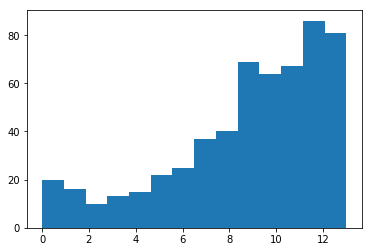

In [14]:
#set new binary column, less than median/median or greater

clean_nh_data['Q18_m'] = np.where(clean_nh_data['Q18'] >= 10,1,0)
clean_nh_data.loc[clean_nh_data['Q18'].isna(), 'Q18_m'] = np.nan
plt.hist(clean_nh_data.Q18.dropna(),bins=14)
clean_nh_data['Q18'].describe()

In [15]:
outcome_col_names.append('Q18_m')
#q18_m added to outcome_col_names list

### Describe outcome variables

In [16]:

clean_nh_data[outcome_col_names].describe()

,q15,q19,q20,Q16_a,Q17_a,Q18_m
count,565.000000,565.000000,565.000000,416.000000,420.000000,565.000000
mean,0.766372,0.654867,0.584071,0.737981,0.542857,0.527434
std,0.423513,0.475833,0.493318,0.440263,0.498754,0.499689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Engagement Indicator 
Sum questions to Q16, Q17, Q18, Q19, Q20, and Q21

In [17]:
clean_nh_data['out_sum']=clean_nh_data[outcome_col_names].sum(axis = 1, skipna = True)

In [18]:
clean_nh_data['qio'].describe()

count    800.000000
mean       1.500000
std        0.500313
min        1.000000
25%        1.000000
50%        1.500000
75%        2.000000
max        2.000000
Name: qio, dtype: float64

In [19]:
clean_nh_data['out_sum'].describe()

count    800.000000
mean       2.457500
std        2.233703
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max        6.000000
Name: out_sum, dtype: float64

In [20]:
clean_nh_data['out_sum'].value_counts().sort_index()

0.0    285
1.0     54
2.0     64
3.0    101
4.0     94
5.0    107
6.0     95
Name: out_sum, dtype: int64

In [21]:
clean_nh_data['IEC_engagement'] = clean_nh_data['out_sum']
clean_nh_data['IEC_engagement'] = clean_nh_data['IEC_engagement'].replace(2, 1)
clean_nh_data['IEC_engagement'] = clean_nh_data['IEC_engagement'].replace(3, 2)
clean_nh_data['IEC_engagement'] = clean_nh_data['IEC_engagement'].replace(4, 2)
clean_nh_data['IEC_engagement'] = clean_nh_data['IEC_engagement'].replace(5, 3)
clean_nh_data['IEC_engagement'] = clean_nh_data['IEC_engagement'].replace(6, 3)

In [22]:
pd.crosstab(clean_nh_data['IEC_engagement'],clean_nh_data['qio'])


qio,1.0,2.0
IEC_engagement,,
0.0,188,97
1.0,65,53
2.0,86,109
3.0,61,141


In [23]:
#285, 118, 195, 202